In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

In [2]:
df_cleaned_drop_IF.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'aircraft_type', 'airline_number', 'airline_name',
       'flight_number', 'departure_time', 'arrival_time', 'duration', 'stops',
       'price', 'currency', 'co2_emissions', 'avg_co2_emission_for_this_route',
       'co2_percentage', 'scan_date'],
      dtype='object')

In [3]:
# df_cleaned_drop_IF.head(3)
print(df_cleaned_drop_IF.head(1))

  from_airport_code from_country dest_airport_code dest_country  \
0               YYZ       Canada               ADD     Ethiopia   

                                      aircraft_type airline_number  \
0  Airbus A220-300 Passenger|Boeing 777|Airbus A350          multi   

              airline_name      flight_number       departure_time  \
0  [Air Canada| Ethiopian]  AC418|AC418|AC418  2022-05-02 16:00:00   

          arrival_time  duration  stops  price currency  co2_emissions  \
0  2022-05-04 06:00:00      1860      2  820.0      USD      1089000.0   

   avg_co2_emission_for_this_route  co2_percentage            scan_date  
0                        1126000.0            -3.0  2022-04-29 17:52:59  


In [4]:
group = df_cleaned_drop_IF.groupby(['from_country', 'dest_country'])[['from_airport_code']].count()

group = group.reset_index()
group[group['from_airport_code'] > 2000]


from_country   dest_country  from_airport_code
102    Australia  United States               2199
234       Brazil  United States               2344
636      Germany  United States               2468

In [5]:
group = df_cleaned_drop_IF.groupby(['from_country', 'dest_country', 'stops'])[['from_airport_code']].count()

group = group.reset_index()
group[group['from_airport_code'] > 1000].sort_values(by='from_airport_code', ascending=False)

from_country   dest_country  stops  from_airport_code
247     Australia  United States      2               1681
581        Brazil  United States      2               1519
1567      Germany  United States      1               1352
1568      Germany  United States      2               1088
898         China  United States      2               1077
702        Canada  United States      1               1040

In [6]:
mask_stop1_ga = ((df_cleaned_drop_IF['from_country'] == 'Germany') & (df_cleaned_drop_IF['dest_country'] == 'United States') & (df_cleaned_drop_IF['stops'] == 1))
mask_stop2_ga = ((df_cleaned_drop_IF['from_country'] == 'Germany') & (df_cleaned_drop_IF['dest_country'] == 'United States') & (df_cleaned_drop_IF['stops'] == 2))
df_ga_stop1 = df_cleaned_drop_IF[mask_stop1_ga]
df_ga_stop2 = df_cleaned_drop_IF[mask_stop2_ga]
mean_ga_stop1 = df_ga_stop1['avg_co2_emission_for_this_route'].mean()
mean_ga_stop2 = df_ga_stop2['avg_co2_emission_for_this_route'].mean()

mean_ga_stop1, mean_ga_stop2

(848374.2603550296, 865450.3676470588)

In [7]:
mean_ga_stop1 = df_ga_stop1['co2_emissions'].mean()
mean_ga_stop2 = df_ga_stop2['co2_emissions'].mean()

mean_ga_stop1, mean_ga_stop2

(904980.0295857989, 964973.3455882353)

In [8]:
mean_ga_stop1 = df_ga_stop1['co2_percentage'].mean()
mean_ga_stop2 = df_ga_stop2['co2_percentage'].mean()

mean_ga_stop1, mean_ga_stop2

(7.159763313609467, 11.853860294117647)

In [9]:
def label_co2(value, mean_value):
    return 'below' if value < mean_value else 'above'

# Apply the function to create a new 'label' column
df_ga_stop1['label'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop1))
df_ga_stop2['label'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop2))

C:\Users\punna\AppData\Local\Temp\ipykernel_3100\2078168040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop1['label'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop1))
C:\Users\punna\AppData\Local\Temp\ipykernel_3100\2078168040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop2['label'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop2))


In [10]:
def label_co2(value):
    return 'below' if value < 0 else 'above'

# Apply the function to create a new 'label' column
df_ga_stop1['label percent'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x))
df_ga_stop2['label percent'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x))

C:\Users\punna\AppData\Local\Temp\ipykernel_3100\1743252163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop1['label percent'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x))
C:\Users\punna\AppData\Local\Temp\ipykernel_3100\1743252163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop2['label percent'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x))


In [11]:
df_ga_stop1.groupby(['label'])[['co2_percentage']].count()

co2_percentage
label                
above             561
below             791

In [12]:
df_ga_stop1.groupby(['label percent'])[['co2_percentage']].count()

co2_percentage
label percent                
above                     861
below                     491

In [13]:
df_ga_stop2.groupby(['label'])[['co2_percentage']].count()

co2_percentage
label                
above             517
below             571

In [14]:
df_ga_stop2.groupby(['label percent'])[['co2_percentage']].count()

co2_percentage
label percent                
above                     841
below                     247

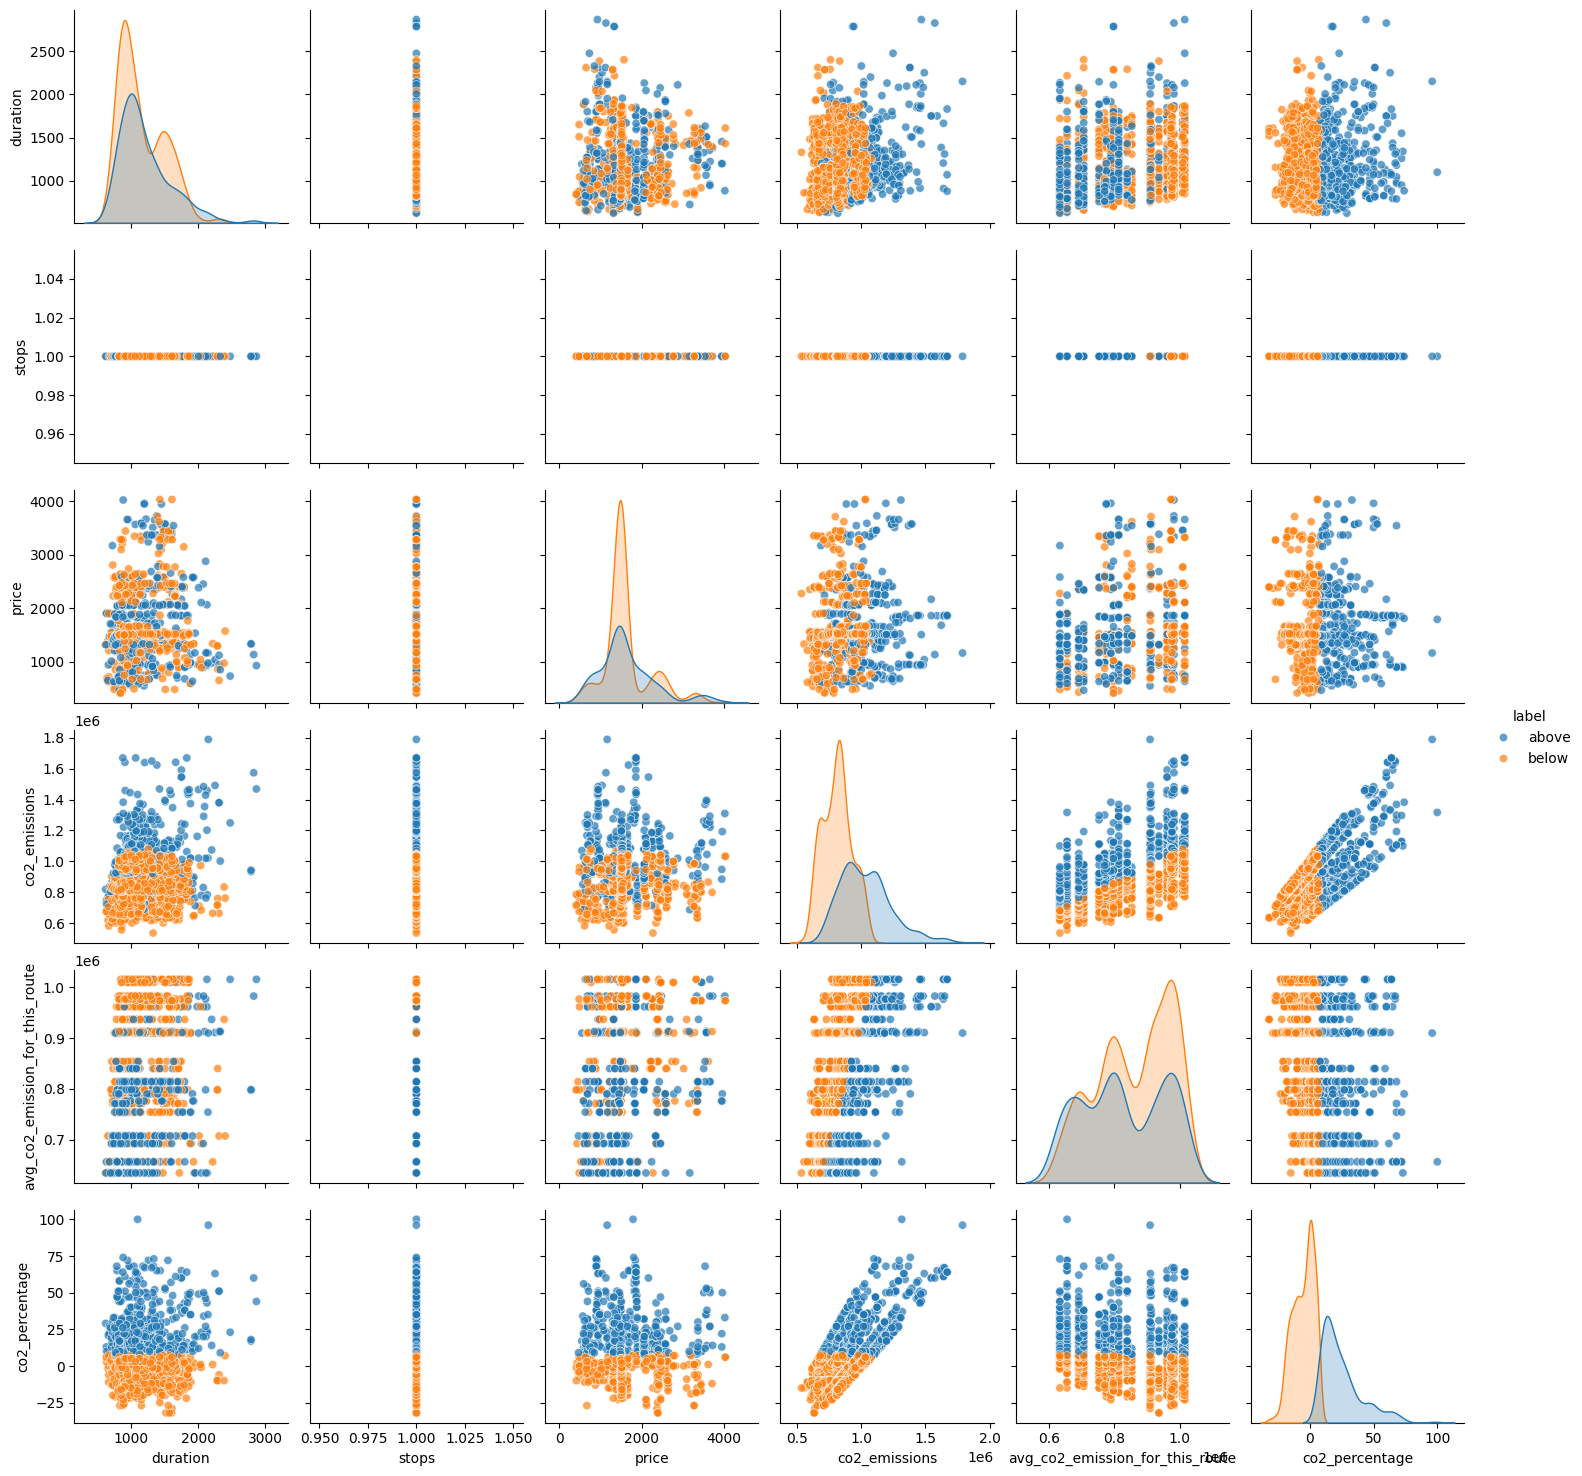

In [15]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop1,
    vars=features,
                 hue='label',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

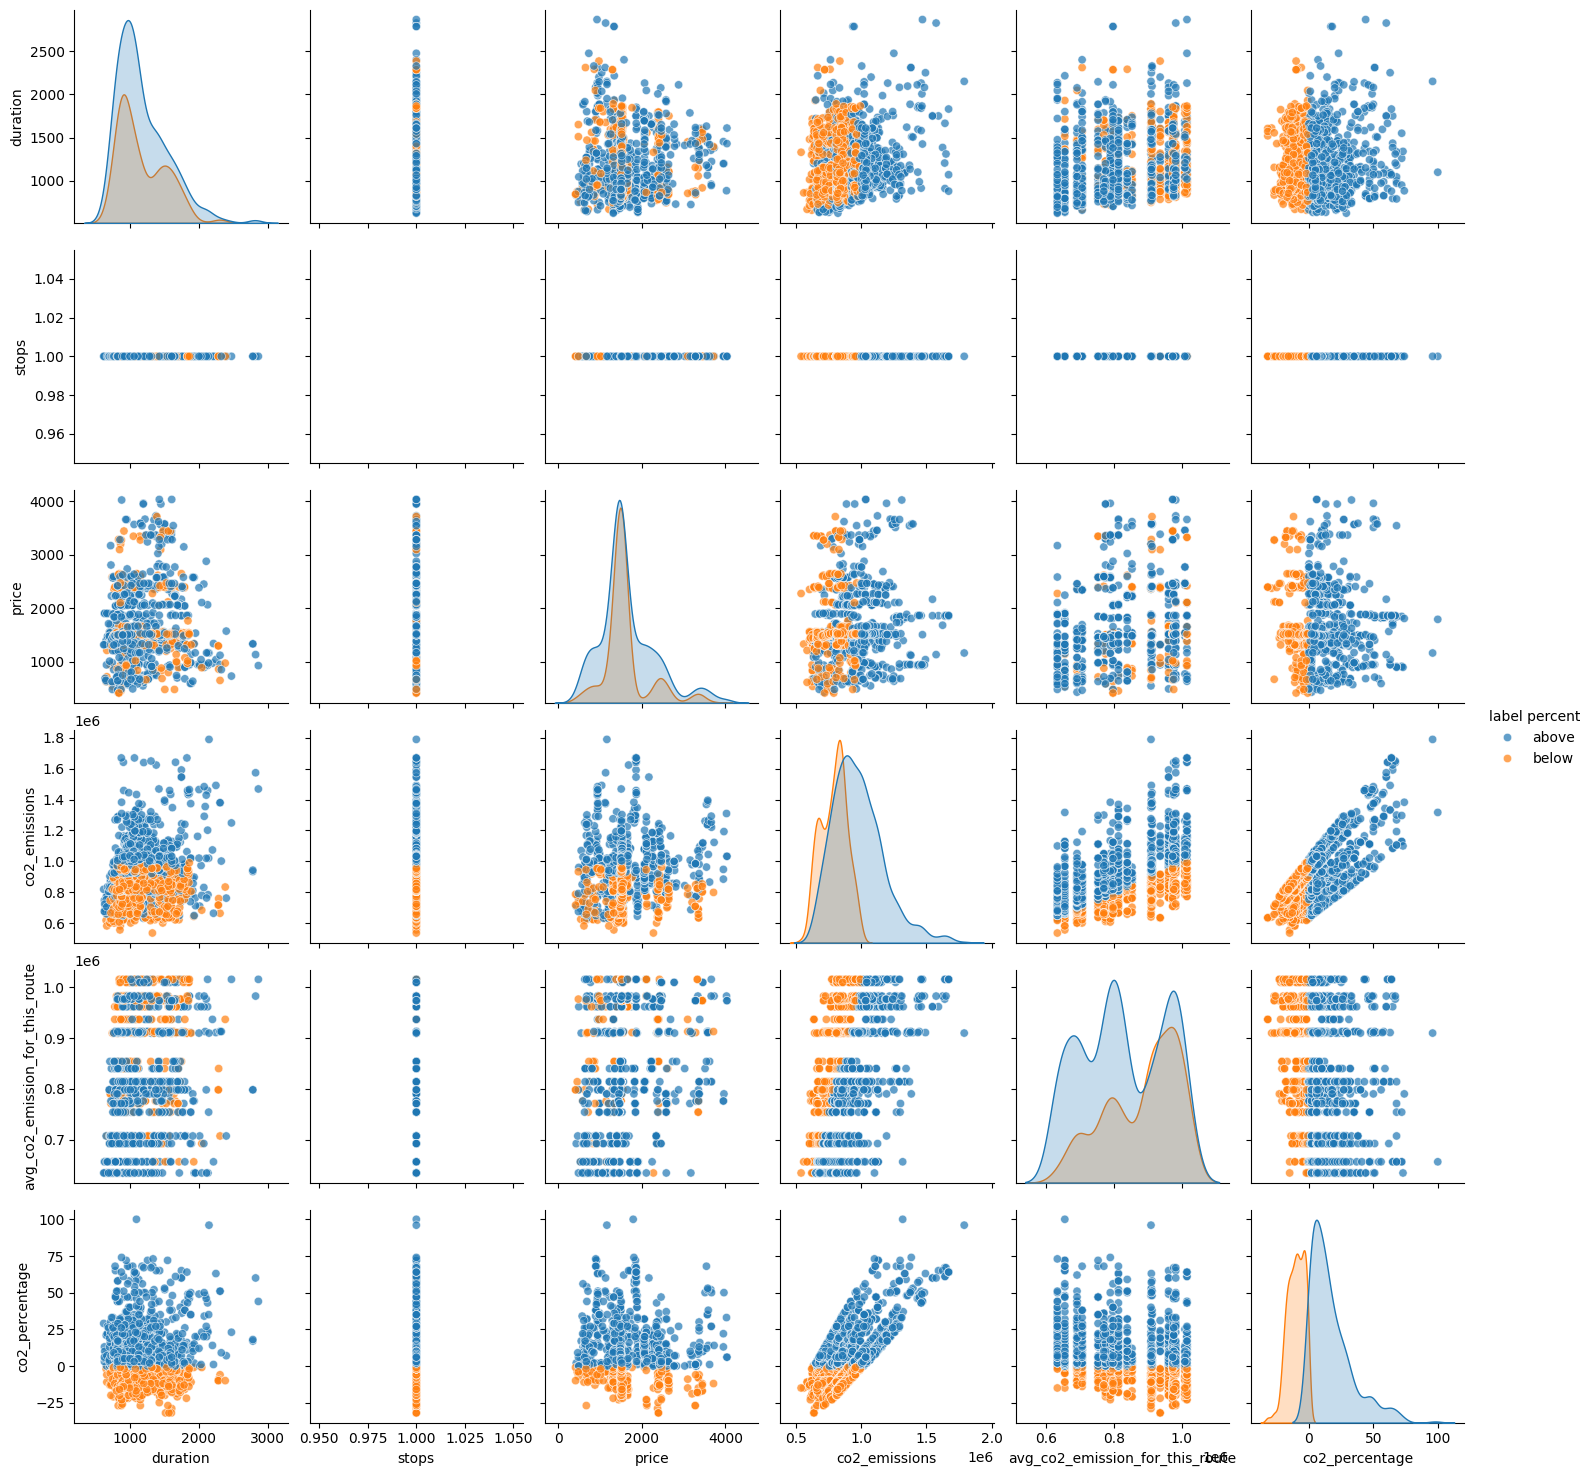

In [16]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop1,
    vars=features,
                 hue='label percent',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

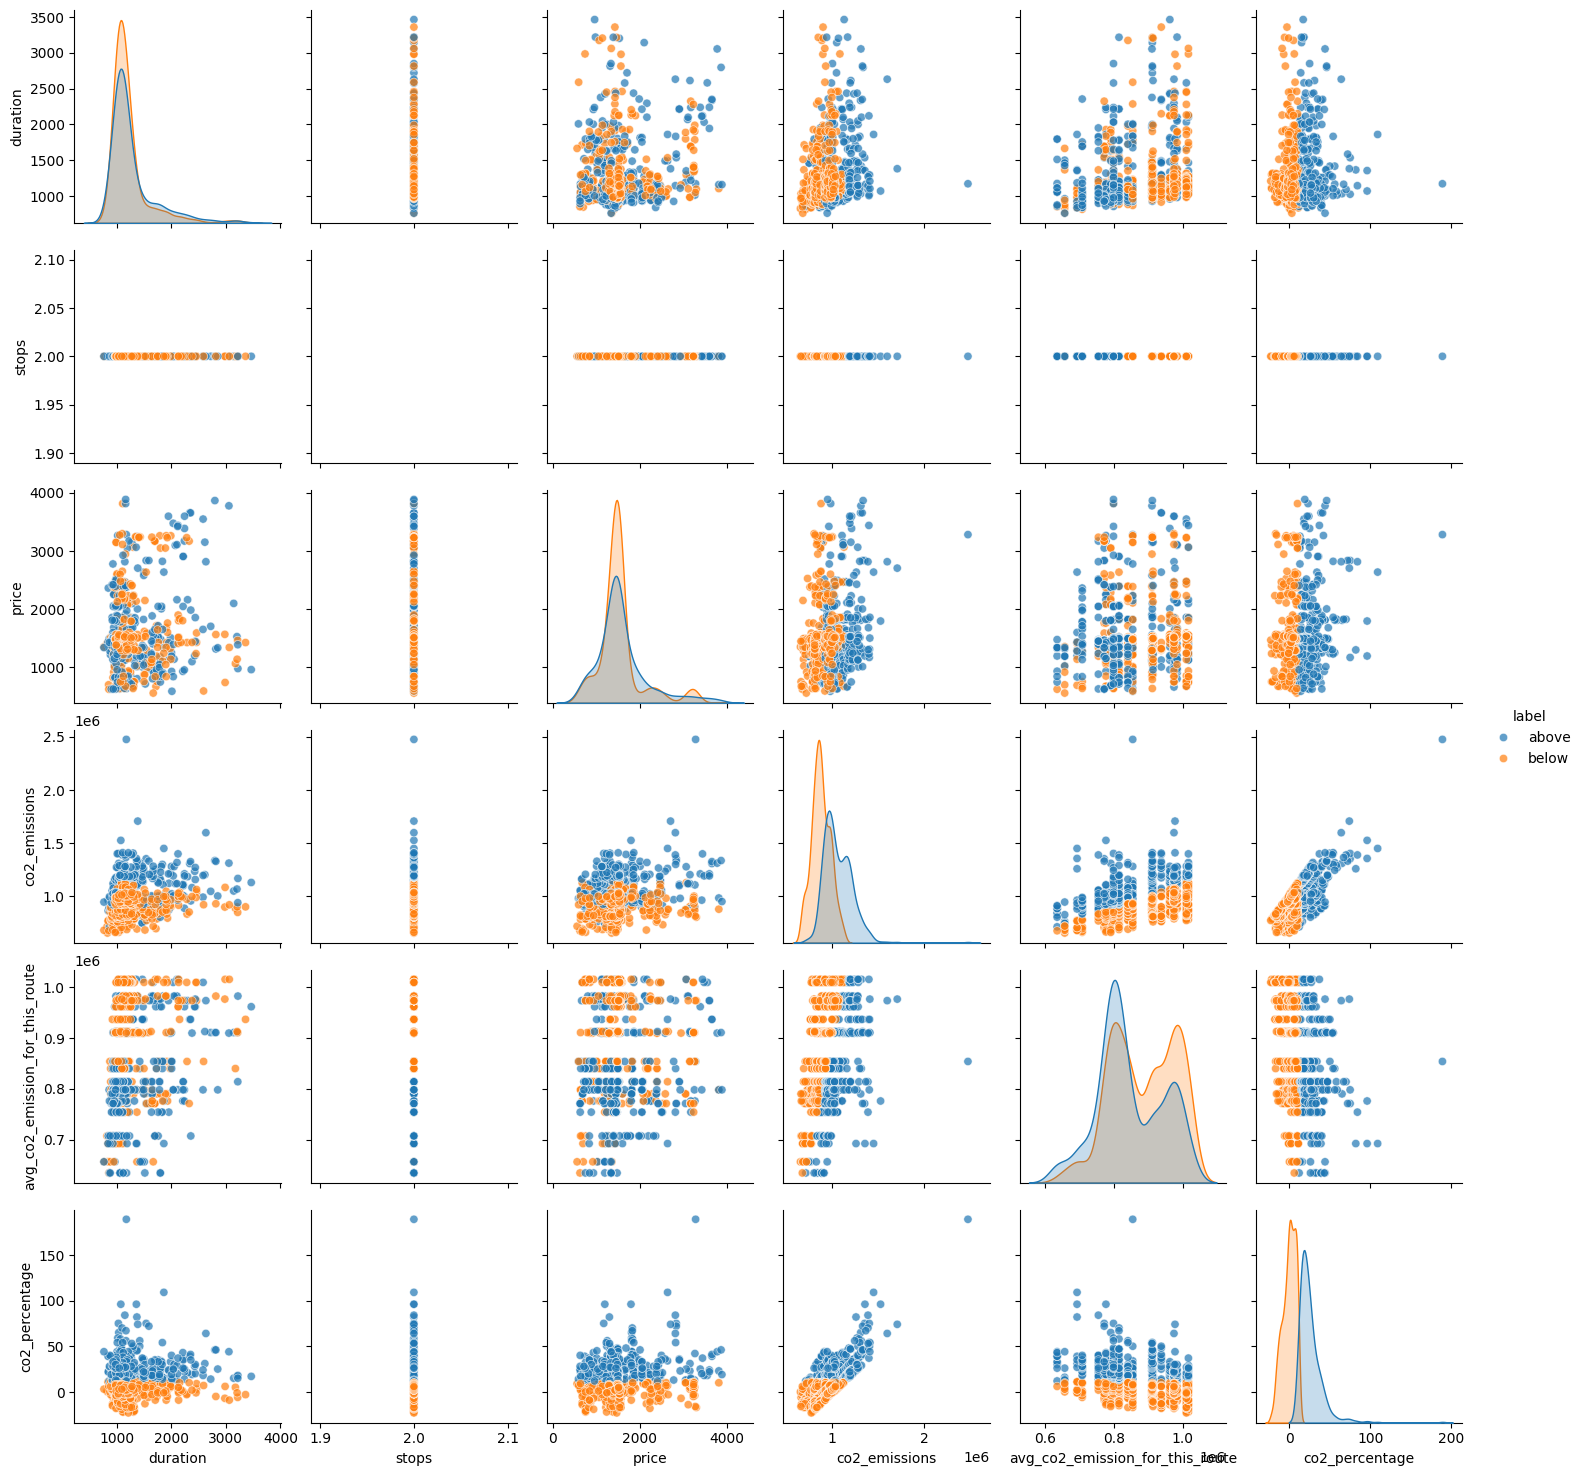

In [17]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop2,
    vars=features,
                 hue='label',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

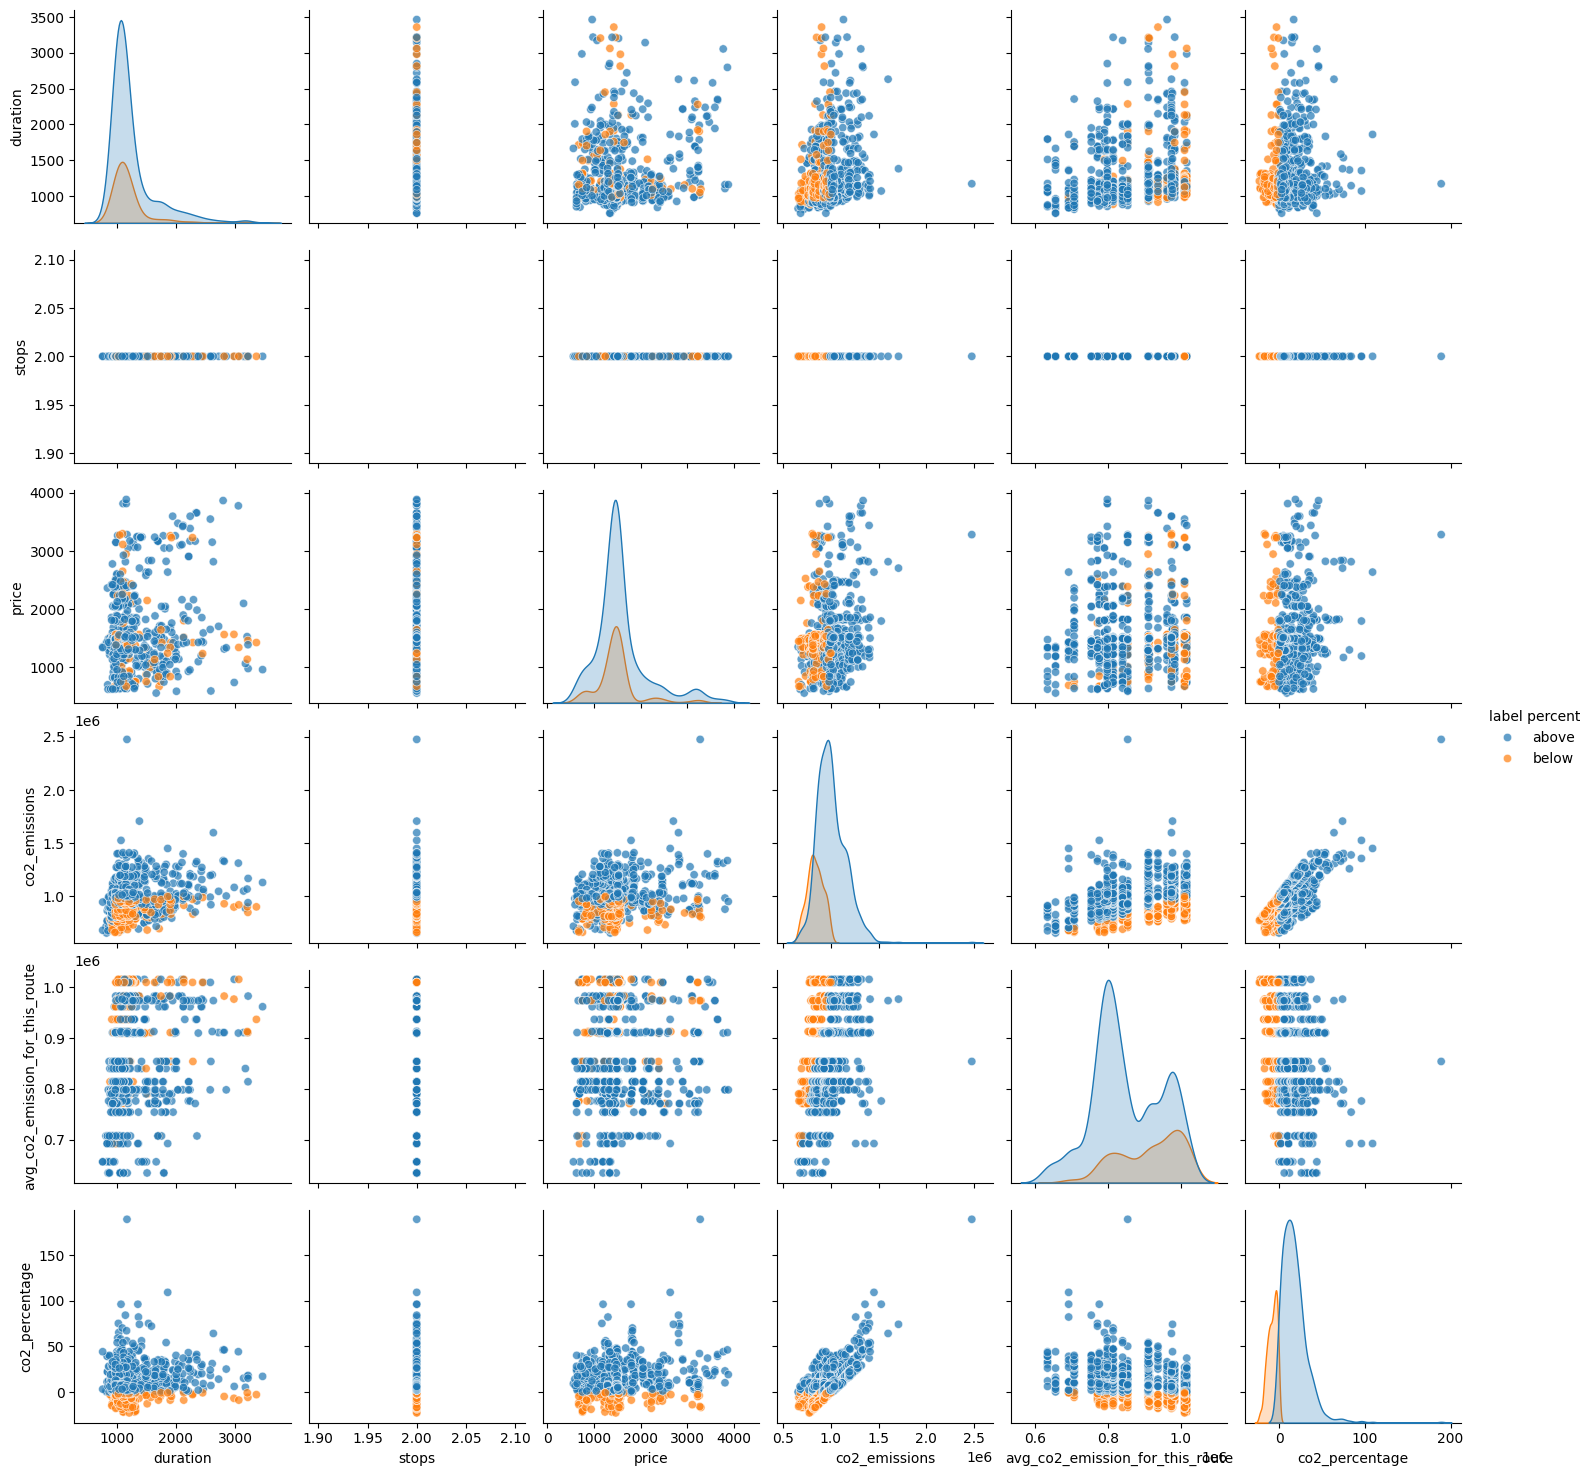

In [18]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop2,
    vars=features,
                 hue='label percent',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

c:\Users\punna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\punna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\punna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\punna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

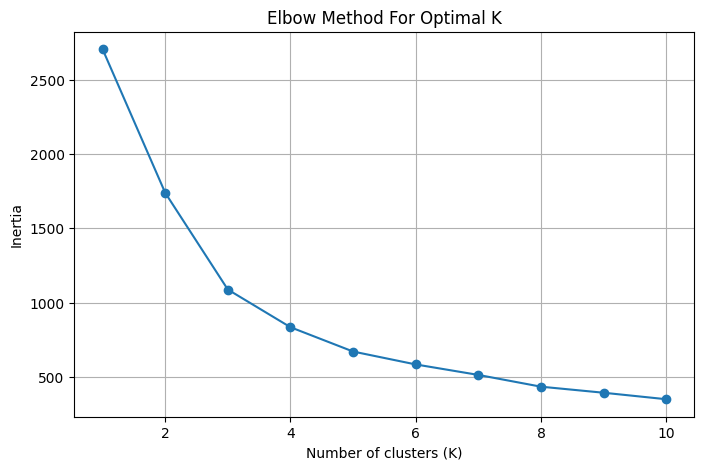

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
features = ['duration', 'co2_percentage']
X = df_ga_stop1[features].dropna()  # Drop missing values if any

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
K_range = range(1, 11)  # Trying K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


c:\Users\punna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


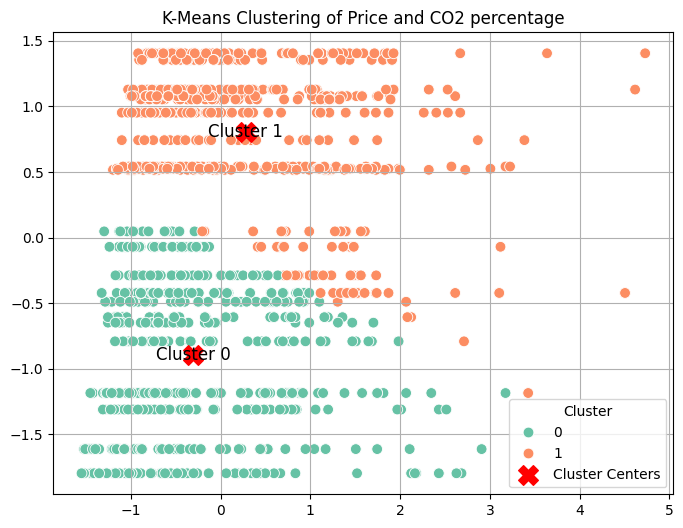

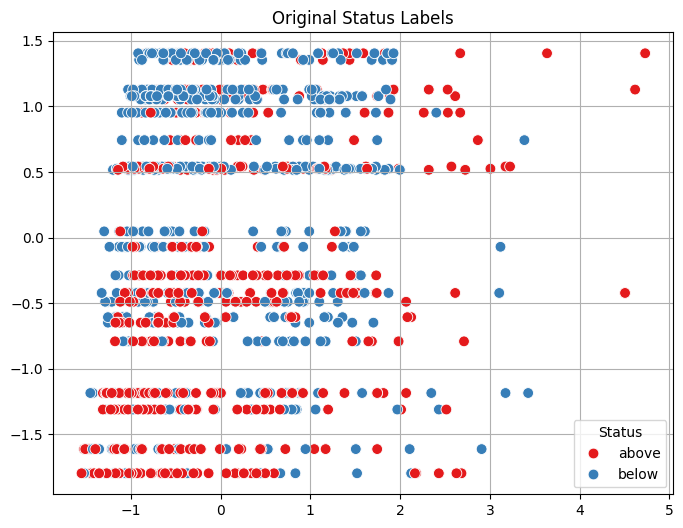

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data
features = ['duration', 'avg_co2_emission_for_this_route']
df_plot = df_ga_stop1[features + ['label']].dropna()

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_plot[features])

# Step 3: Apply K-Means (choose K=3 as an example)
k = 2  # You can change this based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df_plot['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4a: Plot K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=df_plot['cluster'].astype(str),
    palette='Set2',
    s=60
)
# Add cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    marker='X', color='red', s=200, label='Cluster Centers'
)

# Optionally, annotate cluster centers with labels
for i, center in enumerate(cluster_centers):
    plt.text(
        center[0], center[1], f'Cluster {i}', color='black', 
        fontsize=12, ha='center', va='center'
    )
    
plt.title('K-Means Clustering of Price and CO2 percentage')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 4b: Plot by original status (for comparison)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=df_plot['label'],
    palette='Set1',
    s=60
)
plt.title('Original Status Labels')
plt.legend(title='Status')
plt.grid(True)
plt.show()


Confusion Matrix:
[[102   5]
 [  0 164]]

Classification Report:
              precision    recall  f1-score   support

       above       1.00      0.95      0.98       107
       below       0.97      1.00      0.98       164

    accuracy                           0.98       271
   macro avg       0.99      0.98      0.98       271
weighted avg       0.98      0.98      0.98       271



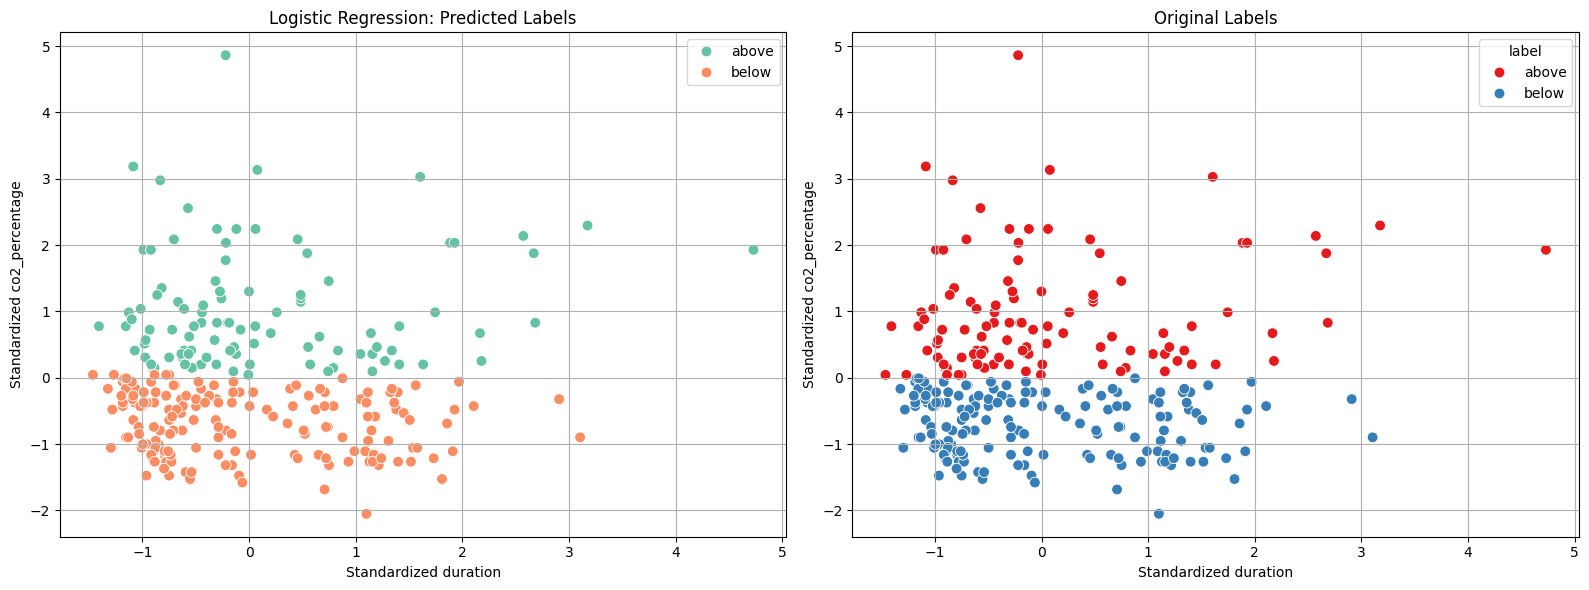

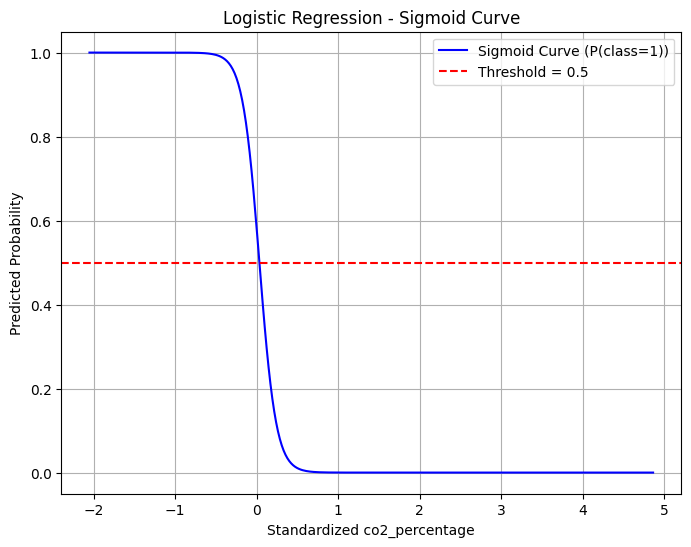

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the data
features = ['duration', 'co2_percentage']
df_plot = df_ga_stop1[features + ['label']].dropna()

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_plot[features])
y = df_plot['label']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plot - Predicted vs Original
plt.figure(figsize=(16, 6))

# Predicted Labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set2', s=60)
plt.title('Logistic Regression: Predicted Labels')
plt.xlabel('Standardized duration')
plt.ylabel('Standardized co2_percentage')
plt.grid(True)

# Original Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='Set1', s=60)
plt.title('Original Labels')
plt.xlabel('Standardized duration')
plt.ylabel('Standardized co2_percentage')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 8: Sigmoid (S-curve) plot for 'co2_percentage'
X_single = df_plot[['co2_percentage']].values
y_single = df_plot['label'].values

# Standardize co2_percentage
scaler_single = StandardScaler()
X_single_scaled = scaler_single.fit_transform(X_single)

# Train logistic regression on single feature
model_single = LogisticRegression()
model_single.fit(X_single_scaled, y_single)

# Generate sigmoid curve
x_range = np.linspace(X_single_scaled.min(), X_single_scaled.max(), 300).reshape(-1, 1)
y_probs = model_single.predict_proba(x_range)[:, 1]

# Plot sigmoid
plt.figure(figsize=(8, 6))
plt.plot(x_range, y_probs, label='Sigmoid Curve (P(class=1))', color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Standardized co2_percentage')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression - Sigmoid Curve')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
[[154   9]
 [ 98  10]]

Classification Report:
              precision    recall  f1-score   support

       above       0.61      0.94      0.74       163
       below       0.53      0.09      0.16       108

    accuracy                           0.61       271
   macro avg       0.57      0.52      0.45       271
weighted avg       0.58      0.61      0.51       271



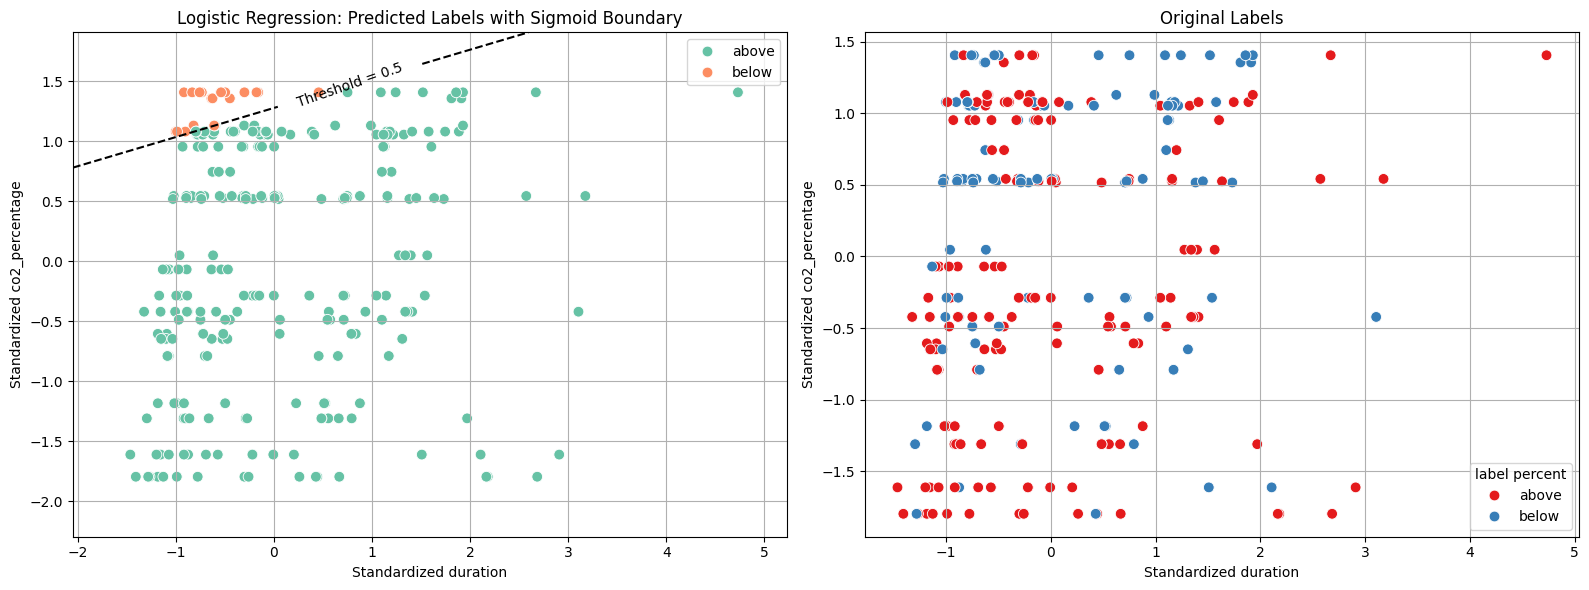

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the data
features = ['duration', 'avg_co2_emission_for_this_route']
df_plot = df_ga_stop1[features + ['label percent']].dropna()

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_plot[features])
y = df_plot['label percent']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plot with sigmoid decision boundary
plt.figure(figsize=(16, 6))

# Plot 1: Predicted Labels with sigmoid curve (decision boundary)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set2', s=60)

# Create meshgrid
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Contour: sigmoid boundary at probability = 0.5
contour = plt.contour(xx, yy, probs, levels=[0.5], colors='black', linestyles='--')
plt.clabel(contour, fmt='Threshold = 0.5', inline=True, fontsize=10)


plt.title('Logistic Regression: Predicted Labels with Sigmoid Boundary')
plt.xlabel('Standardized duration')
plt.ylabel('Standardized co2_percentage')
plt.grid(True)

# Plot 2: Original Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='Set1', s=60)
plt.title('Original Labels')
plt.xlabel('Standardized duration')
plt.ylabel('Standardized co2_percentage')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\punna\AppData\Local\Temp\ipykernel_3100\2705238746.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_std, probabilities, c='red', cmap='bwr', alpha=0.6, edgecolor='k', label='Data Points')


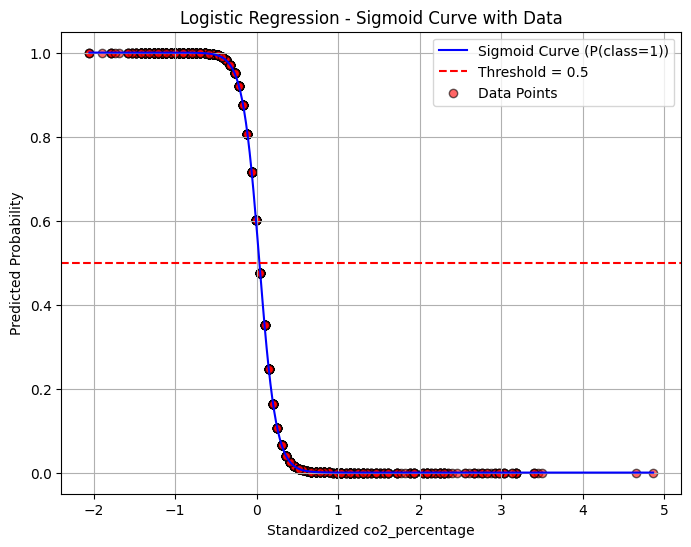

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get the data (example: from a DataFrame)
X = df_ga_stop1[['co2_percentage']].dropna().values  # shape: (n_samples, 1)
y = df_ga_stop1['label'].dropna().values  # shape: (n_samples,)

# Step 2: Standardize co2_percentage
scaler = StandardScaler()
X_std = scaler.fit_transform(X).flatten()  # Now it's a 1D array

# Step 3: Train logistic regression on single feature
logistic_reg = LogisticRegression()
logistic_reg.fit(X_std.reshape(-1, 1), y)

# Step 4: Use your plotting code
probabilities = logistic_reg.predict_proba(X_std.reshape(-1, 1))[:, 1]

X_range = np.linspace(X_std.min(), X_std.max(), 300)
sigmoid = logistic_reg.predict_proba(X_range.reshape(-1, 1))[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(X_range, sigmoid, color='blue', label='Sigmoid Curve (P(class=1))')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.scatter(X_std, probabilities, c='red', cmap='bwr', alpha=0.6, edgecolor='k', label='Data Points')
plt.xlabel("Standardized co2_percentage")
plt.ylabel("Predicted Probability")
plt.title("Logistic Regression - Sigmoid Curve with Data")
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
[[154   0]
 [  0 173]]

Classification Report:
              precision    recall  f1-score   support

       above       1.00      1.00      1.00       154
       below       1.00      1.00      1.00       173

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



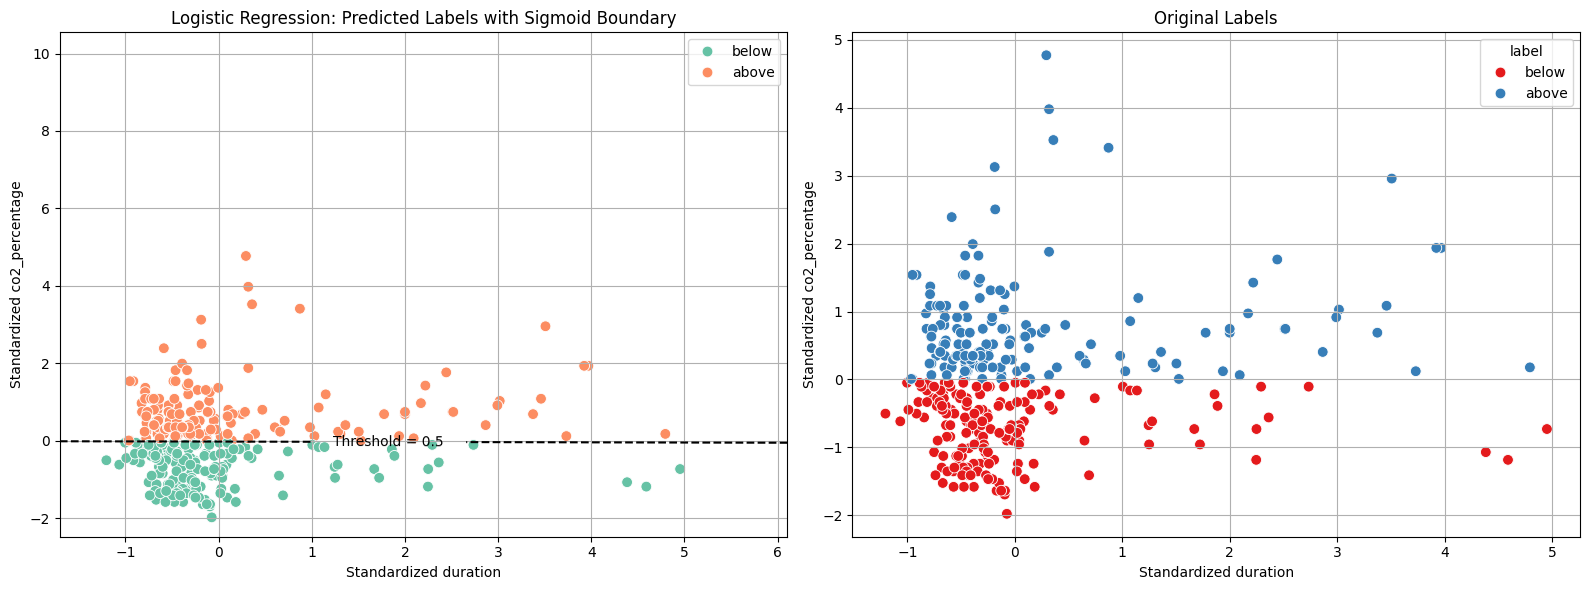

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the data
features = ['duration', 'co2_percentage']
df_plot = df_ga_stop2[features + ['label']].dropna()

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_plot[features])
y = df_plot['label']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plot with sigmoid decision boundary
plt.figure(figsize=(16, 6))

# Plot 1: Predicted Labels with sigmoid curve (decision boundary)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set2', s=60)

# Create meshgrid
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Contour: sigmoid boundary at probability = 0.5
contour = plt.contour(xx, yy, probs, levels=[0.5], colors='black', linestyles='--')
plt.clabel(contour, fmt='Threshold = 0.5', inline=True, fontsize=10)


plt.title('Logistic Regression: Predicted Labels with Sigmoid Boundary')
plt.xlabel('Standardized duration')
plt.ylabel('Standardized co2_percentage')
plt.grid(True)

# Plot 2: Original Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='Set1', s=60)
plt.title('Original Labels')
plt.xlabel('Standardized duration')
plt.ylabel('Standardized co2_percentage')
plt.grid(True)

plt.tight_layout()
plt.show()

Confusion Matrix:
[[154   0]
 [  0 173]]

Classification Report:
              precision    recall  f1-score   support

       above       1.00      1.00      1.00       154
       below       1.00      1.00      1.00       173

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



c:\Users\punna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


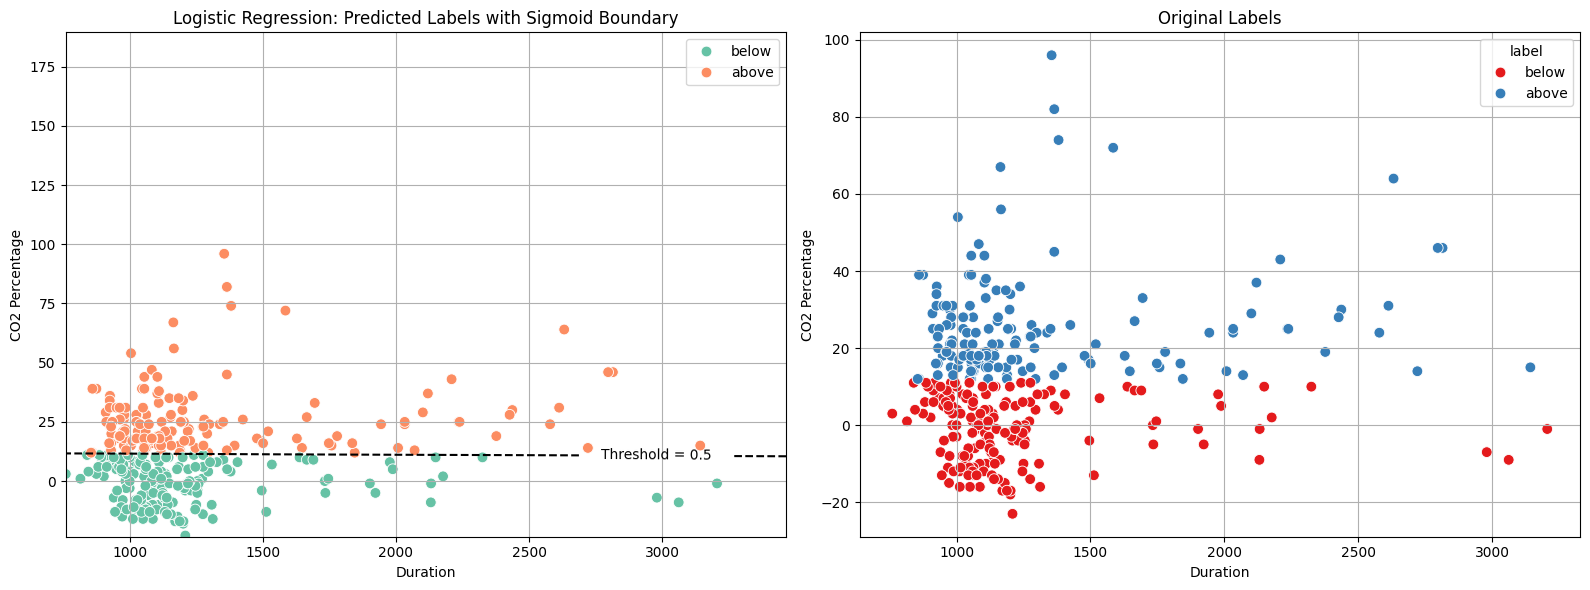

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare the data
features = ['duration', 'co2_percentage']
df_plot = df_ga_stop2[features + ['label']].dropna()

# Step 2: Use raw features without scaling
X = df_plot[features]
y = df_plot['label']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plot with sigmoid decision boundary
plt.figure(figsize=(16, 6))

# Plot 1: Predicted Labels with sigmoid curve (decision boundary)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['duration'], y=X_test['co2_percentage'], hue=y_pred, palette='Set2', s=60)

# Create meshgrid
x_min, x_max = X['duration'].min() - 0.5, X['duration'].max() + 0.5
y_min, y_max = X['co2_percentage'].min() - 0.5, X['co2_percentage'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Contour: sigmoid boundary at probability = 0.5
contour = plt.contour(xx, yy, probs, levels=[0.5], colors='black', linestyles='--')
plt.clabel(contour, fmt='Threshold = 0.5', inline=True, fontsize=10)

plt.title('Logistic Regression: Predicted Labels with Sigmoid Boundary')
plt.xlabel('Duration')
plt.ylabel('CO2 Percentage')
plt.grid(True)

# Plot 2: Original Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['duration'], y=X_test['co2_percentage'], hue=y_test, palette='Set1', s=60)
plt.title('Original Labels')
plt.xlabel('Duration')
plt.ylabel('CO2 Percentage')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\punna\AppData\Local\Temp\ipykernel_3100\642792590.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_std, probabilities, c='red', cmap='bwr', alpha=0.6, edgecolor='k', label='Data Points')


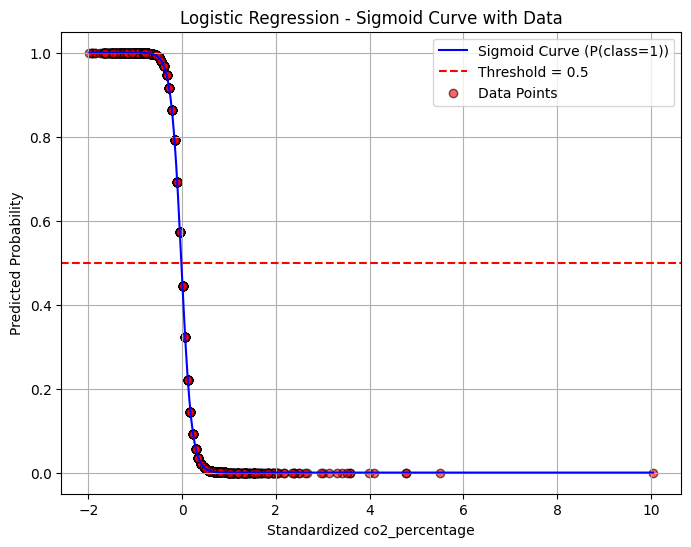

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get the data (example: from a DataFrame)
X = df_ga_stop2[['co2_percentage']].dropna().values  # shape: (n_samples, 1)
y = df_ga_stop2['label'].dropna().values  # shape: (n_samples,)

# Step 2: Standardize co2_percentage
scaler = StandardScaler()
X_std = scaler.fit_transform(X).flatten()  # Now it's a 1D array

# Step 3: Train logistic regression on single feature
logistic_reg = LogisticRegression()
logistic_reg.fit(X_std.reshape(-1, 1), y)

# Step 4: Use your plotting code
probabilities = logistic_reg.predict_proba(X_std.reshape(-1, 1))[:, 1]

X_range = np.linspace(X_std.min(), X_std.max(), 300)
sigmoid = logistic_reg.predict_proba(X_range.reshape(-1, 1))[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(X_range, sigmoid, color='blue', label='Sigmoid Curve (P(class=1))')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.scatter(X_std, probabilities, c='red', cmap='bwr', alpha=0.6, edgecolor='k', label='Data Points')
plt.xlabel("Standardized co2_percentage")
plt.ylabel("Predicted Probability")
plt.title("Logistic Regression - Sigmoid Curve with Data")
plt.legend()
plt.grid(True)
plt.show()
